In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib as mpl
import pyemu
from pathlib import Path
import os, shutil
import flopy as fp

/Users/mnfienen/opt/miniconda3/envs/modflow_training/lib/python3.11/site-packages/pyemu/pst/pst_handler.py:15: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


In [2]:
ies_dir = Path('../tmprun/')
pst = pyemu.Pst(str(ies_dir / 'mv.ies.pst'))

In [3]:
pst.parameter_data

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom,extra,i,j,zone
parnme,,,,,,,,,,,,,,
hk_aq_i:10_j:10_zone:5,hk_aq_i:10_j:10_zone:5,log,factor,200.000000,0.010000,1000.000000,hk_aq_5,1.0,0.0,1,NaN,10,10,5
hk_aq_i:10_j:13_zone:5,hk_aq_i:10_j:13_zone:5,log,factor,200.000000,0.010000,1000.000000,hk_aq_5,1.0,0.0,1,NaN,10,13,5
hk_aq_i:10_j:16_zone:5,hk_aq_i:10_j:16_zone:5,log,factor,200.000000,0.010000,1000.000000,hk_aq_5,1.0,0.0,1,NaN,10,16,5
hk_aq_i:10_j:19_zone:5,hk_aq_i:10_j:19_zone:5,log,factor,200.000000,0.010000,1000.000000,hk_aq_5,1.0,0.0,1,NaN,10,19,5
hk_aq_i:10_j:1_zone:4,hk_aq_i:10_j:1_zone:4,log,factor,200.000000,0.010000,750.000000,hk_aq_4,1.0,0.0,1,NaN,10,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hk_clay_i:9_j:9_zone:1,hk_clay_i:9_j:9_zone:1,log,factor,1.000000,0.000100,100.000000,hk_clay_1,1.0,0.0,1,NaN,9,9,1
kaniso,kaniso,log,factor,0.200000,0.001000,0.850000,anisotropy,1.0,0.0,1,NaN,NaN,NaN,NaN
kaniso_clay,kaniso_clay,log,factor,0.500000,0.001000,0.850000,anisotropy_clay,1.0,0.0,1,NaN,NaN,NaN,NaN


In [4]:
obs_true = pst.observation_data
obs_true

,obsnme,obsval,weight,obgnme,extra
obsnme,,,,,
chdflow,chdflow,33390.41096,0.000160,lakegroup,NaN
ds,ds,-894494.00000,0.000026,rivgroup,NaN
pf,pf,-96402.00000,0.000212,rivgroup,NaN
u01,u01,12.05000,8.345518,headgroup,NaN
u02,u02,11.63000,8.345518,headgroup,NaN
u03,u03,12.15000,8.345518,headgroup,NaN
u04,u04,11.44000,8.345518,headgroup,NaN
u05,u05,10.86000,8.345518,headgroup,NaN
u06,u06,10.80000,8.345518,headgroup,NaN


## take a look at the prior MC 

In [5]:
phi = pd.read_csv(ies_dir / 'mv.ies.phi.actual.csv').T.iloc[6:]
phi0 = phi[0]

<Axes: >

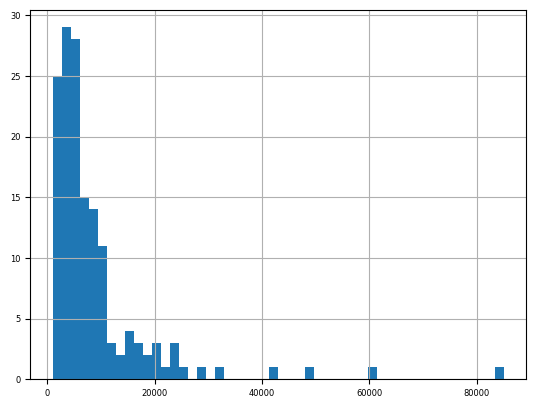

In [6]:
phi0.hist(bins=50)


## but we need to reject "bad" PHI values 

In [7]:
phitoohigh_prior = 20000
indobskeep_prior = phi.loc[phi[0] <= phitoohigh_prior].index

In [8]:
phi0.loc[indobskeep_prior]

0        9011.57
1       12166.30
2        7581.69
3       12714.90
4        2781.47
          ...   
145     15620.40
146     15858.10
147      4231.19
148     10839.40
base     1209.41
Name: 0, Length: 138, dtype: float64

<Axes: >

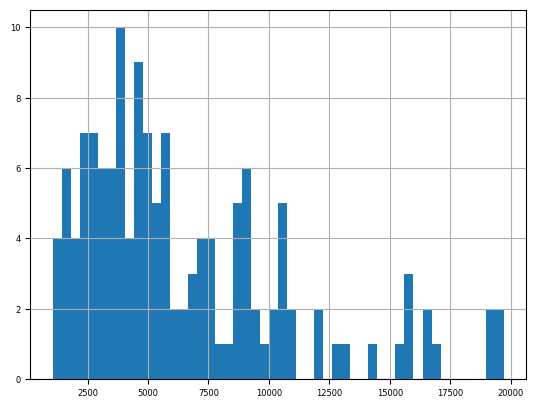

In [9]:
phi0.loc[indobskeep_prior].hist(bins=50)

## let's check out the observations from prior MC and iES

In [10]:
pst = pyemu.Pst(str(ies_dir / 'mv.ies.pst'))

In [11]:
obsdat = pst.observation_data.copy()
obsdat.sample(5)

,obsnme,obsval,weight,obgnme,extra
obsnme,,,,,
u13,u13,7.57,8.345518,headgroup,NaN
u09,u09,8.86,8.345518,headgroup,NaN
ds,ds,-894494.00,0.000026,rivgroup,NaN
u04,u04,11.44,8.345518,headgroup,NaN
u12,u12,4.19,8.345518,headgroup,NaN


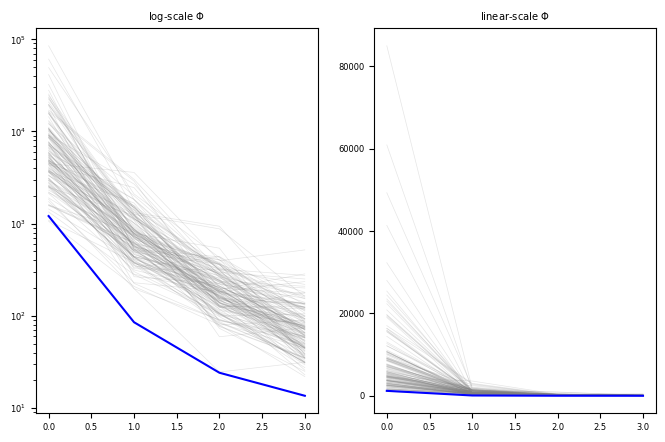

In [12]:
fig, ax = plt.subplots(1,2, figsize=(8,5))
phi.T.plot(legend=False, color='grey',alpha=.2, lw=0.5, ax=ax[0])
phi.loc['base'].plot(color='b', ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('log-scale $\\Phi$')
phi.T.plot(legend=False, color='grey',alpha=.2, lw=0.5, ax=ax[1])
phi.loc['base'].plot(color='b', ax=ax[1])
ax[1].set_title('linear-scale $\\Phi$');


In [13]:
phi = pd.read_csv(ies_dir / 'mv.ies.phi.actual.csv').T.iloc[6:]
for cc in phi.columns:
    phi.loc[phi[cc]>1e6,cc] = np.nan

## We can focus in on iteration 3 as "best" and see how things changed due to iES

In [14]:
citer = 3
obs = pd.read_csv(ies_dir / 'mv.ies.0.obs.csv', index_col=0)
obs_final = pd.read_csv(ies_dir / f'mv.ies.{citer}.obs.csv', index_col=0)

### drop the bad prior realizations

<Axes: >

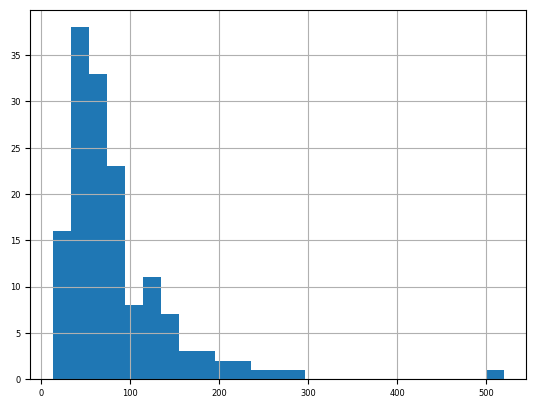

In [15]:
phi[3].hist(bins=25)

## but we need to reject "bad" PHI values again

In [16]:
phitoohigh = 225

In [17]:
indobskeep = phi.loc[phi[3] <= phitoohigh].index

In [18]:
obs = obs.loc[indobskeep_prior]
obs_final = obs_final.loc[indobskeep]

In [19]:
with PdfPages(f'allobs.prior.pdf') as outpdf:
    for cc in obs.columns:
        plt.figure()
        ax = obs[cc].hist(bins=20, color='grey', alpha=.5, density=1)
        ax.axvline(obsdat.loc[cc].obsval, color='orange')
        plt.title(cc)
        plt.tight_layout()
        outpdf.savefig()
        plt.close('all')

In [20]:
with PdfPages(f'allobs.iter_{citer}.pdf') as outpdf:
    for cc in obs.columns:
        plt.figure()
        ax = obs[cc].hist(bins=20, color='grey', alpha=.5, density=1)
        obs_final[cc].hist(bins=20, color='blue', density=1)
        ax.axvline(obsdat.loc[cc].obsval, color='orange')
        plt.title(cc)
        plt.tight_layout()
        outpdf.savefig()
        plt.close('all')

## how does this look spatially?

In [21]:
# load up the model with flopy
sim = fp.mf6.MFSimulation.load(sim_ws = '../tmprun/')
m = sim.get_model()

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package oc...
    loading package chd...
    loading package rch...
    loading package riv...
    loading package wel...
    loading package obs...
  loading solution package at...


In [22]:
df_deep = pd.DataFrame.from_records(m.obs[2].continuous.data['at.csv'])
df_deep

,obsname,obstype,id,id2
0,w01,head,"(4, 2, 17)",None
1,w02,head,"(3, 3, 10)",None
2,w03,head,"(3, 6, 20)",None
3,w04,head,"(3, 12, 22)",None
4,w05,head,"(4, 14, 11)",None
5,w06,head,"(3, 16, 18)",None
6,w07,head,"(3, 17, 1)",None
7,w08,head,"(3, 18, 6)",None
8,w09,head,"(3, 19, 11)",None
9,w10,head,"(3, 18, 22)",None


In [23]:
df_shallow = pd.DataFrame.from_records(m.obs[2].continuous.data['at.wt.csv'])
df_shallow

,obsname,obstype,id,id2
0,u01,head,"(0, 2, 17)",None
1,u02,head,"(0, 3, 10)",None
2,u03,head,"(0, 6, 20)",None
3,u04,head,"(0, 12, 22)",None
4,u05,head,"(0, 14, 11)",None
5,u06,head,"(0, 16, 18)",None
6,u07,head,"(0, 17, 1)",None
7,u08,head,"(0, 18, 6)",None
8,u09,head,"(0, 19, 11)",None
9,u10,head,"(0, 18, 22)",None


## find the cell centers for the head observations for plotting

In [24]:
xc, yc = m.modelgrid.xcellcenters, m.modelgrid.ycellcenters
for df in [df_deep, df_shallow]:
    df['y'] = [yc[i[1],i[2]] for i in df['id']]
    df['x'] = [xc[i[1],i[2]] for i in df['id']]
    

## let's look and the base residuals and get the standard deviation of the residuals

In [25]:
for df in [df_deep, df_shallow]:
    df['resid_prior_std'] = [(obs[i]-obs_true.loc[i].obsval).std() for i in df.obsname]
    df['resid_post_std'] = [(obs_final[i]-obs_true.loc[i].obsval).std() for i in df.obsname]
    df['base_prior_resid'] = [obs.loc['base',i]-obs_true.loc[i].obsval for i in df.obsname]
    df['base_post_resid'] = [obs_final.loc['base',i]-obs_true.loc[i].obsval for i in df.obsname]
    

In [26]:
df

,obsname,obstype,id,id2,y,x,resid_prior_std,resid_post_std,base_prior_resid,base_post_resid
0,u01,head,"(0, 2, 17)",None,18750.0,8750.0,0.970765,0.084222,0.57890,0.00590
1,u02,head,"(0, 3, 10)",None,18250.0,5250.0,0.603873,0.067255,0.20480,-0.09090
2,u03,head,"(0, 6, 20)",None,16750.0,10250.0,1.079408,0.101362,0.41970,-0.12480
3,u04,head,"(0, 12, 22)",None,13750.0,11250.0,1.091258,0.100743,0.30320,0.04740
4,u05,head,"(0, 14, 11)",None,12750.0,5750.0,0.723341,0.086673,-0.32480,-0.18780
5,u06,head,"(0, 16, 18)",None,11750.0,9250.0,1.086536,0.105325,-0.29940,-0.01130
6,u07,head,"(0, 17, 1)",None,11250.0,750.0,0.852796,0.103402,-0.17739,0.01917
7,u08,head,"(0, 18, 6)",None,10750.0,3250.0,1.059539,0.093389,-0.29058,0.00987
8,u09,head,"(0, 19, 11)",None,10250.0,5750.0,1.381613,0.112235,-0.63241,0.00374
9,u10,head,"(0, 18, 22)",None,10750.0,11250.0,1.172275,0.119636,-0.32940,0.00890


Text(0.5, 0.98, 'Base Realization Shallow Residuals')

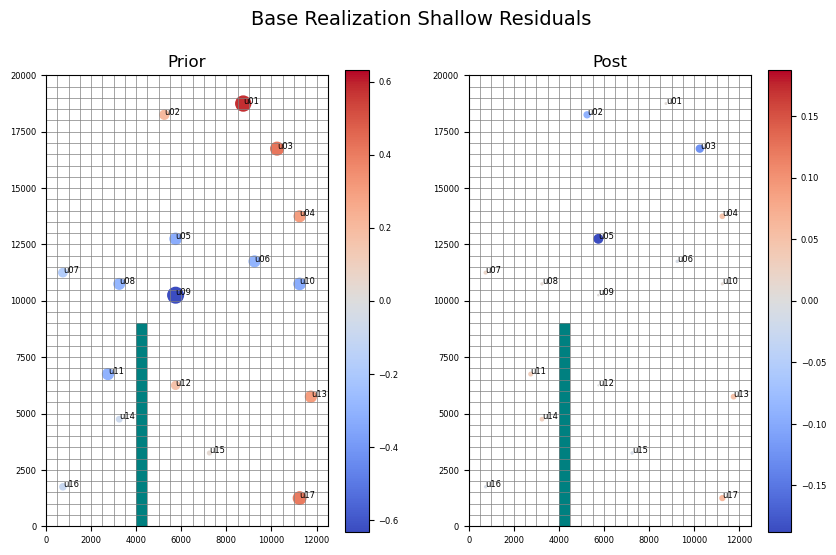

In [27]:
fig, allax = plt.subplots(1,2, figsize=(10, 6))
for ax, cc in zip(allax,['base_prior_resid','base_post_resid']):
    ax.set_aspect('equal')
    pmv = fp.plot.PlotMapView(m, ax=ax)
    lc = pmv.plot_grid(lw=0.5)
    # pmv.plot_array(m.npf.k[1].array, alpha=.1)
    pmv.plot_bc("RIV")
    c = ax.scatter(df_shallow.x,df_shallow.y, s=np.abs(df_shallow[cc])*200,c=df_shallow[cc],
                  norm=mpl.colors.CenteredNorm(),cmap='coolwarm')
    [ax.text(x,y,s) for x,y,s, in zip(df_shallow.x.values,df_shallow.y.values,df_shallow.obsname.values)]
    plt.colorbar(c)
    ax.set_title(cc.split('_')[1].capitalize(), fontsize=12)
plt.suptitle('Base Realization Shallow Residuals', fontsize=14)

Text(0.5, 0.98, 'Base Realization Deep Residuals')

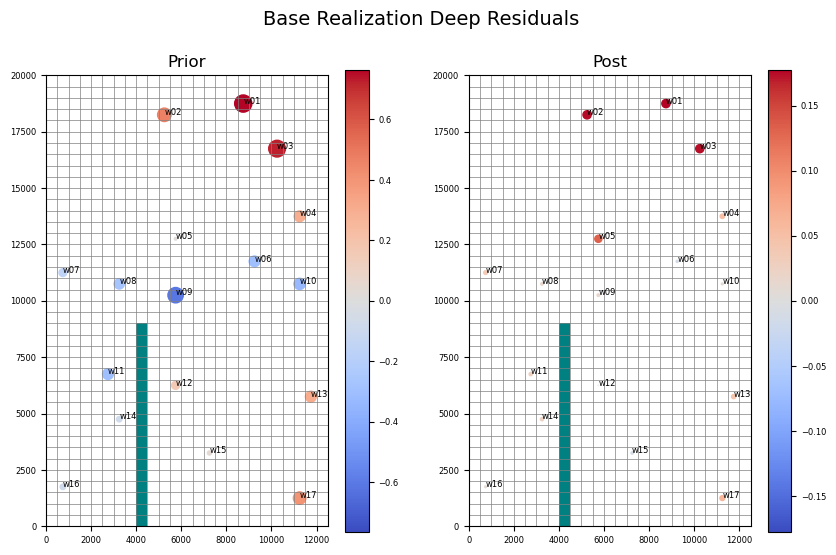

In [28]:
fig, allax = plt.subplots(1,2, figsize=(10, 6))
for ax, cc in zip(allax,['base_prior_resid','base_post_resid']):
    ax.set_aspect('equal')
    pmv = fp.plot.PlotMapView(m, ax=ax)
    lc = pmv.plot_grid(lw=0.5)
    # pmv.plot_array(m.npf.k[1].array, alpha=.1)
    pmv.plot_bc("RIV")
    c = ax.scatter(df_deep.x,df_deep.y, s=np.abs(df_deep[cc])*200,c=df_deep[cc],
                   norm=mpl.colors.CenteredNorm(),cmap='coolwarm')
    [ax.text(x,y,s) for x,y,s, in zip(df_deep.x.values,df_deep.y.values,df_deep.obsname.values)]

    plt.colorbar(c)
    ax.set_title(cc.split('_')[1].capitalize(), fontsize=12)
plt.suptitle('Base Realization Deep Residuals', fontsize=14)

Text(0.5, 0.98, 'Standard Deviation of Shallow Residuals')

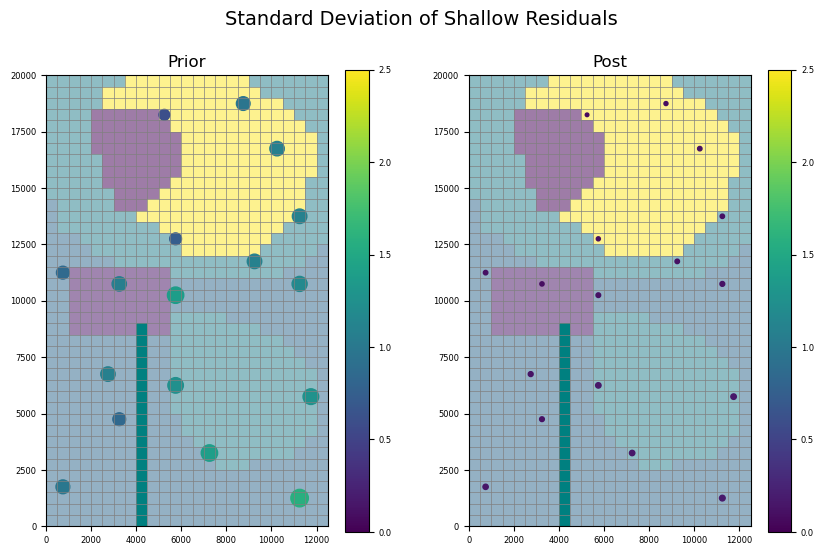

In [29]:
fig, allax = plt.subplots(1,2, figsize=(10, 6))
for ax, cc in zip(allax,['resid_prior_std','resid_post_std']):
    ax.set_aspect('equal')
    pmv = fp.plot.PlotMapView(m, ax=ax)
    lc = pmv.plot_grid(lw=0.5)
    pmv.plot_array(m.npf.k[1].array, alpha=.3)
    pmv.plot_bc("RIV")
    pmv.plot_bc("WEL", color='k')
    
    c = ax.scatter(df_shallow.x,df_shallow.y, s=df_shallow[cc]*100,c=df_shallow[cc], vmin=0, vmax=2.5)
    plt.colorbar(c)
    ax.set_title(cc.split('_')[1].capitalize(), fontsize=12)
plt.suptitle('Standard Deviation of Shallow Residuals', fontsize=14)
    

Text(0.5, 0.98, 'Standard Deviation of Deep Residuals')

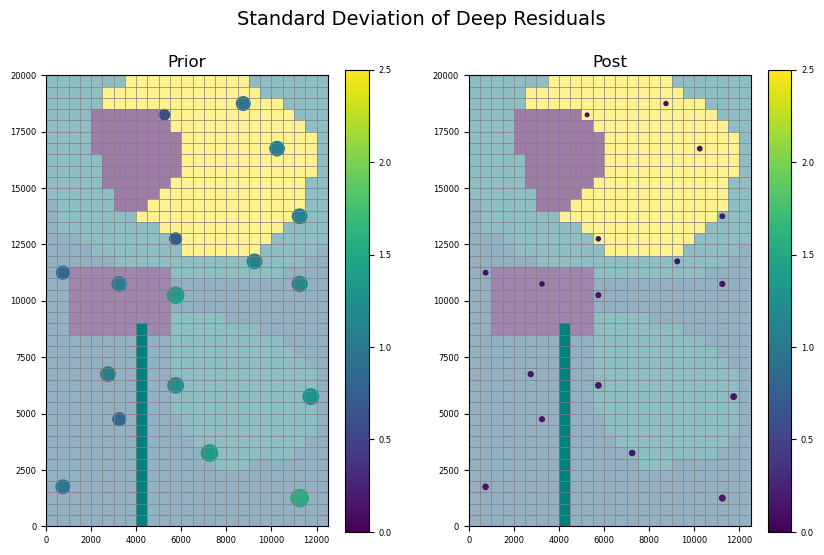

In [30]:
fig, allax = plt.subplots(1,2, figsize=(10, 6))
for ax, cc in zip(allax,['resid_prior_std','resid_post_std']):
    ax.set_aspect('equal')
    pmv = fp.plot.PlotMapView(m, ax=ax)
    lc = pmv.plot_grid(lw=0.5)
    pmv.plot_array(m.npf.k[1].array, alpha=.3)
    pmv.plot_bc("RIV")
    c = ax.scatter(df_deep.x,df_deep.y, s=df_deep[cc]*100,c=df_deep[cc], vmin=0, vmax=2.5)
    plt.colorbar(c)
    ax.set_title(cc.split('_')[1].capitalize(), fontsize=12)
plt.suptitle('Standard Deviation of Deep Residuals', fontsize=14)
    

# Visualize a single set of fields

In [31]:
tmpdir = Path('../scratch')
if tmpdir.exists():
    shutil.rmtree(tmpdir)
shutil.copytree(ies_dir, tmpdir)

PosixPath('../scratch')

In [32]:
pst = pyemu.Pst(str(tmpdir / 'mv.ies.pst'))

In [33]:
pars = pd.read_csv(ies_dir / 'mv.ies.3.par.csv', index_col=0)
pars

,hk_aq_i:10_j:10_zone:5,hk_aq_i:10_j:13_zone:5,hk_aq_i:10_j:16_zone:5,hk_aq_i:10_j:19_zone:5,hk_aq_i:10_j:1_zone:4,hk_aq_i:10_j:22_zone:5,hk_aq_i:10_j:4_zone:4,hk_aq_i:10_j:7_zone:1,hk_aq_i:13_j:10_zone:5,hk_aq_i:13_j:13_zone:5,...,hk_clay_i:3_j:3_zone:1,hk_clay_i:3_j:9_zone:1,hk_clay_i:9_j:15_zone:1,hk_clay_i:9_j:21_zone:1,hk_clay_i:9_j:3_zone:1,hk_clay_i:9_j:9_zone:1,kaniso,kaniso_clay,rch,rv1
real_name,,,,,,,,,,,,,,,,,,,,,
0,126.0700,192.3260,69.3309,649.934,144.2430,1000.000,750.0000,163.7840,476.5590,185.6380,...,0.818034,0.219927,0.571303,0.076912,0.011559,0.080096,0.125253,0.022725,0.003573,213197.0
1,136.3080,239.7140,148.5650,317.241,606.4580,1000.000,16.0391,236.8810,183.1720,258.3880,...,0.126494,0.130550,5.363910,3.032980,5.677640,0.449929,0.154544,0.114678,0.003455,501633.0
2,68.3102,1000.0000,199.8890,624.523,750.0000,982.325,750.0000,449.6960,28.6135,306.9600,...,1.309530,4.173350,17.607600,0.316393,0.303270,0.308550,0.132598,0.027919,0.003492,652866.0
3,537.0730,605.0460,217.7640,102.198,63.7695,139.704,326.0320,423.1660,111.5500,404.3670,...,0.046988,0.850214,0.216459,9.779850,0.775392,2.140140,0.072012,0.186216,0.003571,322872.0
4,701.0260,1000.0000,397.7480,104.126,149.7910,254.794,92.4632,197.5560,187.6340,200.4740,...,1.740160,2.706950,1.034730,20.624800,7.090740,0.053643,0.288077,0.065873,0.003605,258230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,84.2746,1000.0000,703.0330,141.797,701.3030,273.854,739.4830,826.5730,458.2020,215.9580,...,21.213300,0.579596,0.534615,0.096074,0.832954,5.216680,0.059776,0.025600,0.003548,1000000.0
146,402.9760,1000.0000,409.2280,495.936,16.1216,725.596,76.9710,561.8900,17.4970,21.6361,...,1.657020,0.257091,4.699620,1.609520,0.342470,4.329470,0.180876,0.249230,0.003615,440748.0
147,396.6470,72.6634,125.5560,698.277,80.5781,1000.000,63.1086,25.2137,76.2940,562.0520,...,0.183421,0.896654,1.447310,0.588137,0.027438,1.483670,0.206097,0.241264,0.003583,398259.0


In [34]:
pst.control_data.noptmax=0

## good to check out the base realization, but could choose another

In [35]:
real_to_plot = 'base'

In [36]:
pst.parameter_data.loc[pars.loc[real_to_plot].index, 'parval1'] = pars.loc[real_to_plot]

In [37]:
pst.write(str(tmpdir / 'testrun.pst'), version=2)

noptmax:0, npar_adj:119, nnz_obs:37


In [38]:
pyemu.os_utils.run('pestpp-ies testrun.pst', str(tmpdir))



             pestpp-ies: a GLM iterative ensemble smoother

                   by the PEST++ development team


version: 5.2.7
binary compiled on Sep  5 2023 at 07:38:31

started at 09/14/23 16:36:41
...processing command line: ' pestpp-ies testrun.pst'
...using serial run manager

using control file: "testrun.pst"
in directory: "/Users/mnfienen/Documents/GIT/modflow-memphis-2023/exercises/PEST/scratch"
on host: "IGSACB116LHMNFI"

processing control file testrun.pst

Note: 'NOPTMAX' == 0, switching to forgiveness mode when checking inputs

noptmax = 0, resetting max_run_fail = 1
checking model IO files...done
              starting serial run manager ...


  ---  initializing  ---  

  ---  'noptmax'=0, running control file parameter values and quitting  ---  
...saving control file parameter ensemble to  testrun.base.par.csv
...initializing prior parameter covariance matrix
...parcov loaded  from parameter bounds, using par_sigma_range 6
...running control file parameter values



 

/Users/mnfienen/opt/miniconda3/envs/modflow_training/lib/python3.11/site-packages/pyemu/pst/pst_handler.py:15: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.4.2 06/28/2023

   MODFLOW 6 compiled Jul 05 2023 20:29:14 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Government shall be held liable for any damages resulting from its 
authorized or unauthoriz

In [39]:
idom = m.dis.idomain.array[2]

## viz the k fields and other parameters

saved par and rei files for realization BASE


pestpp-ies analysis complete...
started at 09/14/23 16:36:41
finished at 09/14/23 16:36:42
took 0.0166667 minutes


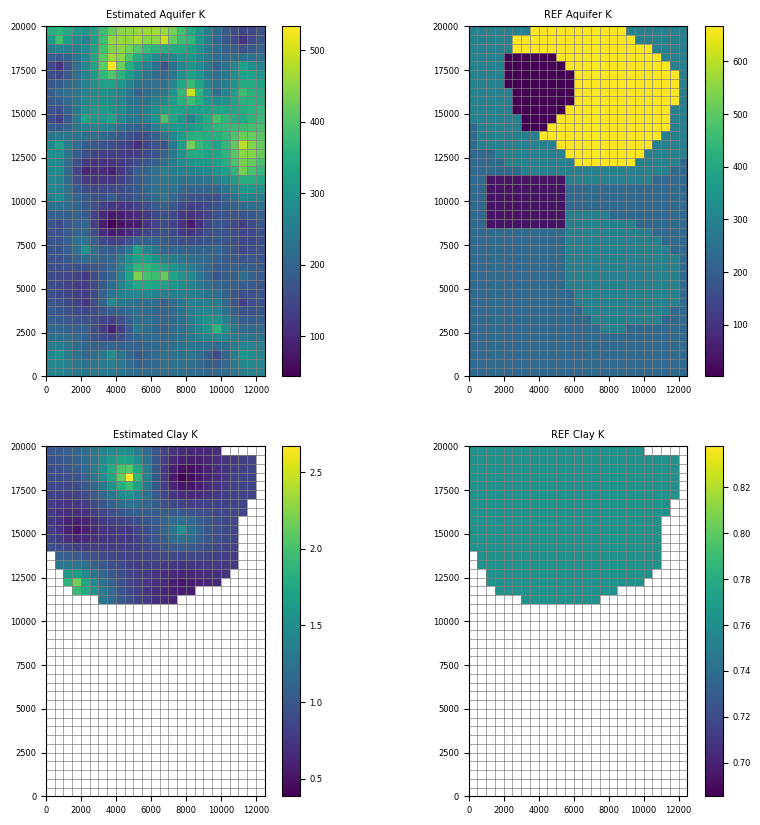

In [40]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
for cax, carr, ctitle in zip(ax.ravel(), [np.loadtxt(tmpdir / 'k_aq.ref'), m.npf.k.data[1],
                          np.loadtxt(tmpdir / 'k_clay.ref'), m.npf.k.data[2]],
                         ['Estimated Aquifer K','REF Aquifer K','Estimated Clay K','REF Clay K']):
    cax.set_aspect('equal')
    pmv = fp.plot.PlotMapView(m, ax=cax)
    lc = pmv.plot_grid(lw=0.5)
    if 'clay' in ctitle.lower():
        carr[idom<0]=np.nan
    c = pmv.plot_array(carr)
    plt.colorbar(c)
    cax.set_title(ctitle)

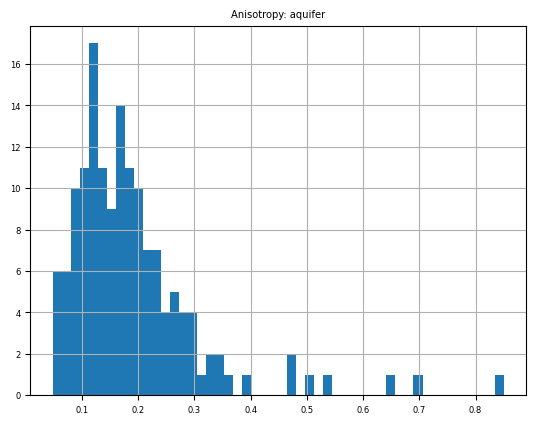

In [41]:
pars.kaniso.hist(bins=50)
plt.title('Anisotropy: aquifer');

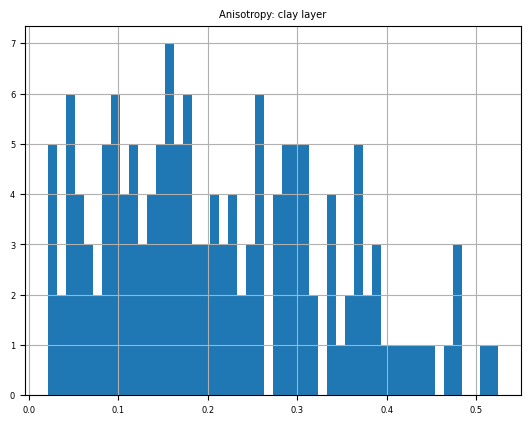

In [42]:
pars.kaniso_clay.hist(bins=50)
plt.title('Anisotropy: clay layer');

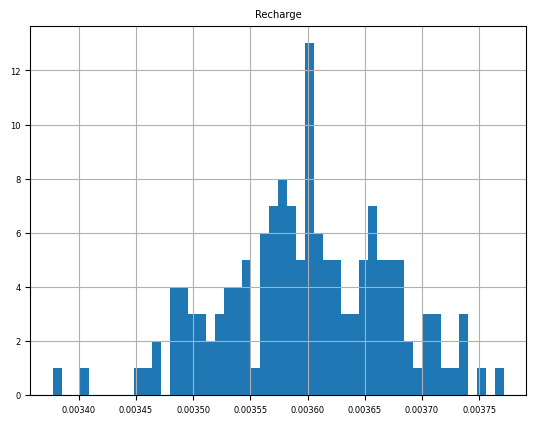

In [43]:
pars.rch.hist(bins=50)
plt.title('Recharge');

In [44]:
mfinal = fp.mf6.MFSimulation.load(sim_ws = str(tmpdir)).get_model()
h = mfinal.output.head().get_data()

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package oc...
    loading package chd...
    loading package rch...
    loading package riv...
    loading package wel...
    loading package obs...
  loading solution package at...


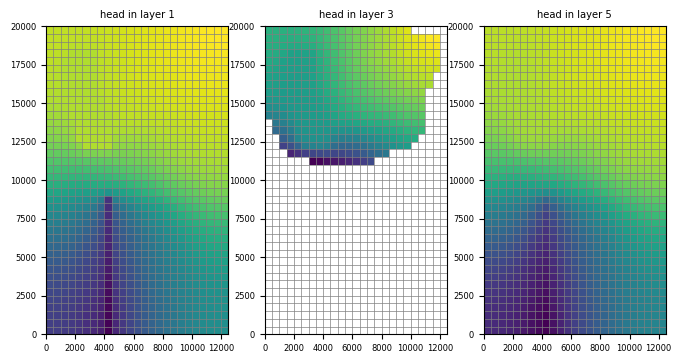

In [45]:
fig,ax = plt.subplots(1,3, figsize=(8,4))
for i,cax  in zip([0,2,4],ax):
    pmv = fp.plot.PlotMapView(mfinal, ax=cax)
    pmv.plot_grid(lw=0.5)
    pmv.plot_array(h[i])
    cax.set_title(f'head in layer {i+1}')